In [1]:
from tqdm import tqdm
import time
import os
import csv
import sqlite3
import numpy as np
import matplotlib.pyplot  as plt
import random
from collections import defaultdict
import pandas as pd
from igraph import *
import matplotlib.pyplot as plt
import enchant
import numpy as np
import networkx as nx
from scipy.stats.stats import pearsonr  
from scipy import stats

In [2]:
data = pd.read_pickle("/home/dsi/avitalab/combinedDB/seqCountCombinedDBLen.pkl")

In [3]:
data

,amino_acid,counts,Length
0,CASSLGETQYF,2843,11
1,CASSLGYEQYF,2751,11
2,CASSLGGNTEAFF,2700,13
3,CASSLQETQYF,2679,11
4,CASSLGGTEAFF,2658,12
...,...,...,...
181110958,CASSLIAGSSQPQHF,1,15
181110959,CASSLIAGSSQYF,1,13
181110960,CASSLIAGSSREQFF,1,15
181110961,CASSLIAGSSRIGELFF,1,17


In [4]:
data2 = data.groupby('counts').apply(lambda x: x.sample(1)).reset_index(drop=True)

In [5]:
data2

,amino_acid,counts,Length
0,CSARGLHDTQYF,1,12
1,CASSWETVMDTEAFF,2,15
2,CASSRRGVEGTDTQYF,3,16
3,CSARDGSGRASYEQYF,4,16
4,CASSLEKRGDTNTGELFF,5,18
...,...,...,...
2256,CASSLGGTEAFF,2658,12
2257,CASSLQETQYF,2679,11
2258,CASSLGGNTEAFF,2700,13
2259,CASSLGYEQYF,2751,11


In [6]:
aa = data2["amino_acid"]

In [7]:
aa

0             CSARGLHDTQYF
1          CASSWETVMDTEAFF
2         CASSRRGVEGTDTQYF
3         CSARDGSGRASYEQYF
4       CASSLEKRGDTNTGELFF
               ...        
2256          CASSLGGTEAFF
2257           CASSLQETQYF
2258         CASSLGGNTEAFF
2259           CASSLGYEQYF
2260           CASSLGETQYF
Name: amino_acid, Length: 2261, dtype: object

In [8]:
with open("/home/dsi/avitalab/example_seqs.tsv", 'w') as f:
    for line in aa:
        f.write(f"{line}\n")

In [ ]:
# RUN IN TERMINAL
# olga-compute_pgen --humanTRB -i example_seqs.tsv -o example_pgens.tsv

In [9]:
example_pgens = pd.read_csv("/home/dsi/avitalab/example_pgens.tsv", sep='\t', header=None)

In [10]:
example_pgens

,0,1
0,CSARGLHDTQYF,9.324449e-10
1,CASSWETVMDTEAFF,7.637716e-12
2,CASSRRGVEGTDTQYF,8.920118e-10
3,CSARDGSGRASYEQYF,1.987023e-10
4,CASSLEKRGDTNTGELFF,2.151770e-11
...,...,...
2256,CASSLGGTEAFF,2.134340e-06
2257,CASSLQETQYF,1.310370e-06
2258,CASSLGGNTEAFF,2.371952e-06
2259,CASSLGYEQYF,4.318403e-06


In [11]:
example_pgens = example_pgens[1].to_list()

In [12]:
example_pgens

[9.324448895587219e-10,
 7.637715658714624e-12,
 8.920117765307153e-10,
 1.9870230307798867e-10,
 2.1517696506349983e-11,
 9.817848189421415e-10,
 6.18143135934668e-11,
 6.13668790869545e-10,
 1.0892147234994407e-09,
 2.1946476008779957e-09,
 1.161111149916819e-09,
 9.795902975084067e-10,
 2.298734235125796e-09,
 1.368976486443386e-08,
 2.625864564219358e-09,
 5.606518775285976e-09,
 1.811190615781119e-09,
 7.349181803697592e-09,
 4.062862191357922e-09,
 1.6961577044144451e-09,
 1.595888890117972e-09,
 2.116513277706036e-09,
 6.675813203937373e-09,
 1.4717679729425372e-08,
 5.318408791640696e-09,
 7.51479274296406e-10,
 5.563729629411431e-09,
 5.386892944900307e-09,
 6.250110356439369e-09,
 5.8590704801184285e-09,
 2.0865321914496856e-09,
 3.498087435626058e-09,
 9.884766397059832e-09,
 1.537490307557412e-09,
 1.5008151989923016e-09,
 6.560234846022794e-09,
 5.6957280191866465e-09,
 1.3079231480896173e-08,
 5.446545710047069e-09,
 8.363837932958197e-09,
 2.2638870540857573e-09,
 8.7835

In [15]:
data2['olga'] = example_pgens

In [16]:
data2

,amino_acid,counts,Length,olga
0,CSARGLHDTQYF,1,12,9.324449e-10
1,CASSWETVMDTEAFF,2,15,7.637716e-12
2,CASSRRGVEGTDTQYF,3,16,8.920118e-10
3,CSARDGSGRASYEQYF,4,16,1.987023e-10
4,CASSLEKRGDTNTGELFF,5,18,2.151770e-11
...,...,...,...,...
2256,CASSLGGTEAFF,2658,12,2.134340e-06
2257,CASSLQETQYF,2679,11,1.310370e-06
2258,CASSLGGNTEAFF,2700,13,2.371952e-06
2259,CASSLGYEQYF,2751,11,4.318403e-06


In [17]:
olga = data2["olga"]
counts = data2["counts"]

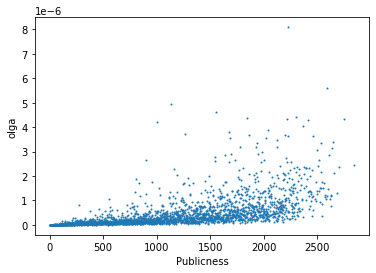

In [23]:
plt.scatter(counts, olga, s = 1)
plt.xlabel("Publicness")
plt.ylabel("olga")
plt.show()

In [24]:
stats.spearmanr(counts, olga)

SpearmanrResult(correlation=0.8035353099677961, pvalue=0.0)

In [26]:
corr, _ = pearsonr(counts, olga)
print(corr)

0.574403112972176


In [27]:
tau, p_value = stats.kendalltau(counts, olga)
print(tau)

0.6120324235889046
